# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can used the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [3]:
#Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
from IPython.display import display

### Question 1: /10 Marks

The negative log likelihood for one observation of a single Poisson random variable is

$$\ell(\lambda; y) = -\Bigg(   y\cdot \ln(\lambda) - \lambda - \ln(y) \Bigg)$$

The negative log likelihood for a collection of $N$ observations, assuming each is independent and Poisson with the same parameter $\lambda$, is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

The negative log likelihood for a collection of $N$ observations, assuming each is independent and Poisson with a *different* parameter $\lambda$ for each one, is

$$\ell(\boldsymbol{\lambda}; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda_i) - \lambda_i - \ln(y_i!) \Bigg)$$

See the difference?

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood. Use numpy functions so that you don't need to use loops. Also, note that the $\sum_{i} \ln(y!)$ term does not affect the location of the maximum because it does not change with $\lambda$, and so you can (and should) omit the $ \ln(y!)$ in your function.

Your code should work for two cases:

First, it should work with a scalar $\lambda$ and a vector $y$. Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

Second, it should work with a vector $\lambda$ and a vector $y$, if they have the same length. (This is the last likelihood function described above.) Test your function by calling it with `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`. In this second case, the first $\lambda$ should be used to evaluate the first $y$, the second $\lambda$ should be used to evaluat the second $y$, and so on. ***YOU SHOULD NOT USE ANY LOOPS - BOTH CASES SHOULD WORK IF YOU CODE IT IN THE SIMPLEST WAY BECAUSE OF HOW NUMPY WORKS.**

**Answer the following below in markdown:** What happens when you set an element of lam to 0 or a negative number and why? 


#### Answer to Question 1

Your answer here.

In [4]:
def poissonNegLogLikelihood(lam,y):
    # Compute negative log likelihood
    neg_log_lik = -(y * np.log(lam) - lam).sum()
    return neg_log_lik

In [5]:
y = np.array([2, 1, 0, 0])
lam = 1.3
print(poissonNegLogLikelihood(lam, y))  # Example with scalar lam

4.412907206597527


In [6]:
y = np.array([2, 1, 0, 0])
lam = np.array([1, 0.5, 1, 3])
print(poissonNegLogLikelihood(lam, y))  # Example with vector lam

6.193147180559945


when lamda = 0 , this gives log(0) which would be give mathematical error, since the log of 0 is undefined. In practice we cannot have a rate parameter o 0 for poisson distribution , because it implies no events occur. And when lambda < 0  taking the log of negative number is undefined , which would led to an error. In practice Poisson distribution requires that lambda must be positive number. 

---

### Question 2: /15 Marks

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$. Hint: Numpy implements the exponential using `np.exp`.

Hint: You should use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [7]:
def poissonRegressionNegLogLikelihood(b, X, y):
   # Compute lambda as exp(X @ beta)
    lam = np.exp(X @ b)  # Matrix multiplication X @ b gives vector, then apply exp element-wise
    
    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam, y)
    
    return neg_log_lik

In [8]:
# Test data
b = np.array([1, 2])
X = np.array([[1, 2, 3], [2, 3, 1]]).T  # Design matrix (3x2)
y = np.array([0, 2, 10])  # Count vector

# Call the function and print the result
result = poissonRegressionNegLogLikelihood(b, X, y)
print(result)


3211.7843052468816


### Question 3: /10 Marks

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?

Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer! 

---


a) We applied the exponential function to  $\mathbf{X}\beta $ because the Poisson rate parameter $\lambda\ $ must always be positive, and the exponential function ensures this since $\exp(\mathbf{X}\beta) $ is always positive for any real number. The exponential guarantees $ \lambda > 0 $, which is necessary for the Poisson distribution.

b) Had we passed $\lambda = \mathbf{X}\beta $ directly, $ \lambda $ could take negative values, which would be invalid for the Poisson distribution as $ \lambda \ $ represents a rate parameter that must be non-negative. This would lead to errors, such as undefined logarithms when calculating the likelihood.

### Question 4: /5 Marks

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [9]:
def modelPrediction(b,X):
    yhat = np.exp(X @ b)
    return yhat

In [10]:
# Test data
b = np.array([1, 2])
X = np.array([[1, 2, 3], [2, 3, 1]]).T

# Call the function and print the predictions
yhat = modelPrediction(b, X)
print(yhat)


[ 148.4131591  2980.95798704  148.4131591 ]


### Question 5: /15 Marks

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? 

In [11]:
def fitModel(X,y):

    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    beta_start = np.ones(X.shape[1])
    # Minimize the appropriate likelihood function
    mle = minimize(poissonRegressionNegLogLikelihood, beta_start, args=(X, y), method='BFGS')
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

# Write code to show your estimated b.


In [12]:
# Test the function
X = np.array([[1, 2, 3], [2, 3, 1]]).T
y = np.array([0, 2, 10])

# Estimate the betas
betas = fitModel(X, y)
print("Estimated coefficients (b):", betas)

Estimated coefficients (b): [ 0.94827558 -0.52953525]


### Question 6: /20 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

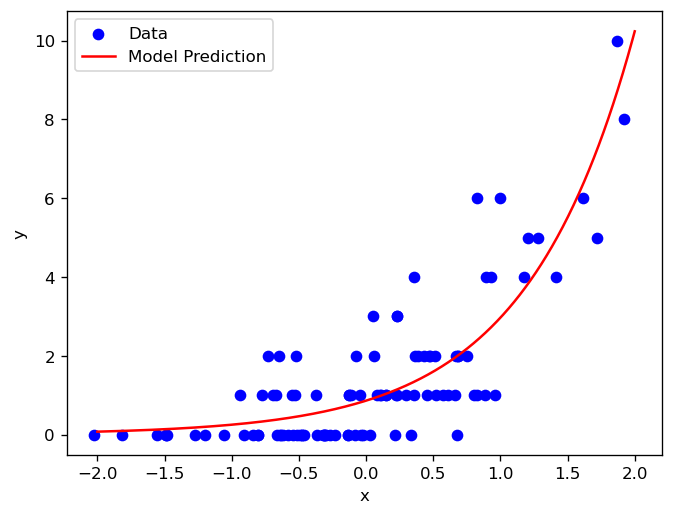

In [13]:
# Loading in the data
df = pd.read_csv('poisson_regression_data.csv')

# Create a scatter plot of the data
fig, ax = plt.subplots(dpi=120)
ax.scatter(df['x'], df['y'], label="Data", color="blue")

# Prepare the design matrix X and the target y
x = df['x'].values 
X = np.column_stack((np.ones_like(x), x))  # Add intercept (bias term)
y = df['y'].values

# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X, y)

# Generate new data for predictions in the range of [-2, 2]
newx = np.linspace(-2, 2, 1001)
newX = np.column_stack((np.ones_like(newx), newx))  # Add intercept to new data

# Make predictions on the new data using the modelPrediction function
y_predicted = modelPrediction(betas, newX)

# Plot the model predictions on the same axis and color the predictions red
ax.plot(newx, y_predicted, label="Model Prediction", color="red")

# Label the axes and add a legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

# Display the plot
plt.show()


### Question 7:  /20 Marks

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and and plot the predictions over the same range.


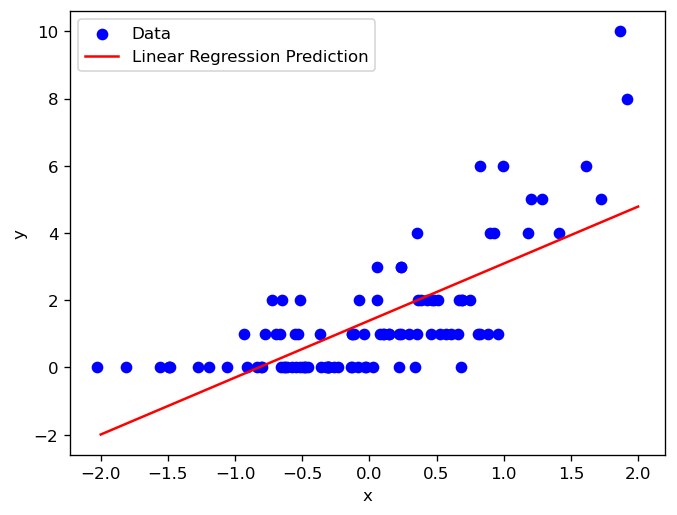

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('poisson_regression_data.csv')

# Prepare the design matrix X and the target y for linear regression
x = df['x'].values
X = np.column_stack((np.ones_like(x), x))  # Add intercept term
y = df['y'].values

# Fit the linear regression model (Ordinary Least Squares)
# OLS parameter estimate: (X^T X)^-1 X^T y
ols_fit = np.linalg.inv(X.T @ X) @ (X.T @ y)

# Generate new data for predictions in the range of [-2, 2]
newx = np.linspace(-2, 2, 1001)
newX = np.column_stack((np.ones_like(newx), newx))  # Add intercept term

# Make predictions using the linear model (y = X @ beta)
y_predicted_ols = newX @ ols_fit

# Plot the data and the linear regression predictions
fig, ax = plt.subplots(dpi=120)

# Scatterplot of original data
ax.scatter(df['x'], df['y'], label="Data", color="blue")

# Plot the linear regression predictions (in red)
ax.plot(newx, y_predicted_ols, label="Linear Regression Prediction", color="red")

# Label the axes and add a legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

# Show the plot
plt.show()


### Question 8: /5 Mark(s)

Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things.  Provide your answer below in markdown in fewer than 5 sentences. 

#### Answer 
Yes, there are major problems with the predictions from linear regression in this context. Linear regression can produce negative predictions, which is problematic because counts must be non-negative. Also, linear regression assumes equal variance across all values, but counts usually have more variation as the values increase, making it less suitable for this type of data.



### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.